## The Chess Library

TIL how to use the `chess` library. It is an excellent library that I used to create a HuggingFace dataset and it can also be used with WebAssembly.

You can install the `chess` library as follows:

::: {.panel-tabset}
## pip
```{.bash filename="Terminal"}
python -m venv .venv
source .venv/bin/activate
python -m pip install chess
```
## uv
```{.bash filename="Terminal"}
uv venv
source .venv/bin/activate
uv pip install chess
```
## wasm
```{.bash filename="Terminal"}
%pip install chess
```
:::

This is all the code needed to display the initial chess board:

In [1]:
#| echo: false
import urllib.parse
from IPython.display import IFrame

def embed_repl(code_str: str):
    code = urllib.parse.quote(code_str)
    return IFrame(f"https://jupyterlite.github.io/demo/repl/index.html?toolbar=1&kernel=python&promptCellPosition=left&hideCodeInput=0&clearCodeContentOnExecute=1&code={code}&execute=0", width=900, height=400)

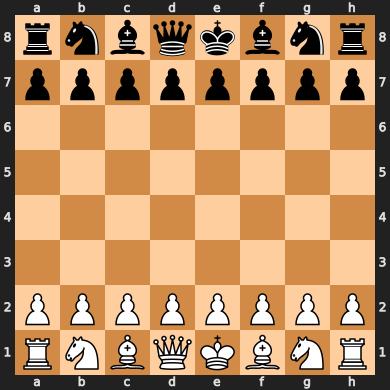

In [2]:
#| echo: true
import chess

board = chess.Board()
board

This is the code to use it here with WebAssembly:

In [3]:
#| echo: false
embed_repl("""%pip install chess

import chess

board = chess.Board()
board""")

This is the code to get the legal moves:

In [4]:
#| echo: true
legal_moves_uci = list(board.legal_moves)[:5] # display only the first 5 legal moves
legal_moves_uci

[Move.from_uci('g1h3'),
 Move.from_uci('g1f3'),
 Move.from_uci('b1c3'),
 Move.from_uci('b1a3'),
 Move.from_uci('h2h3')]

We can also get the legal moves in [standard algebraic notation](https://en.wikipedia.org/wiki/Algebraic_notation_(chess)):

In [5]:
#| echo: true
legal_moves_san = [chess.Board.san(board,move) for move in legal_moves_uci][:5] # display only the first 5 legal moves
legal_moves_san

['Nh3', 'Nf3', 'Nc3', 'Na3', 'h3']

We can see whose turn is it as follows:

In [6]:
#| echo: true
whose_turn = "white" if board.turn == chess.WHITE else "black"
whose_turn

'white'

We can move a piece as follows:

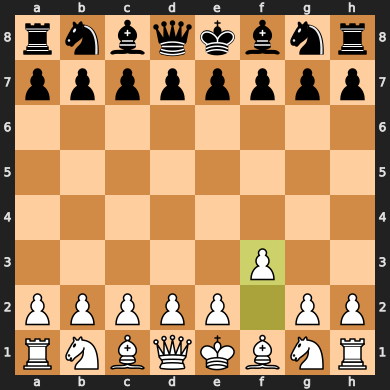

In [7]:
#| echo: true
move_uci = chess.Move.from_uci("f2f3")
if board.is_legal(move_uci):
    board.push(move_uci)
board

Now it is black's turn:

In [8]:
#| echo: true
whose_turn = "white" if board.turn == chess.WHITE else "black"
whose_turn

'black'

We can also move it with [standard algebraic notation](https://en.wikipedia.org/wiki/Algebraic_notation_(chess)):

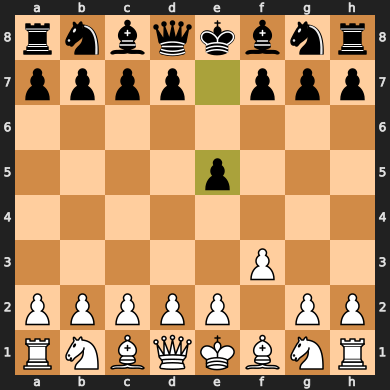

In [9]:
#| echo: true
move = "e5"
move_uci = board.parse_san(move)
if board.is_legal(move_uci):
    board.push_san(move)
board

Let's do two more moves because I want to show you something:

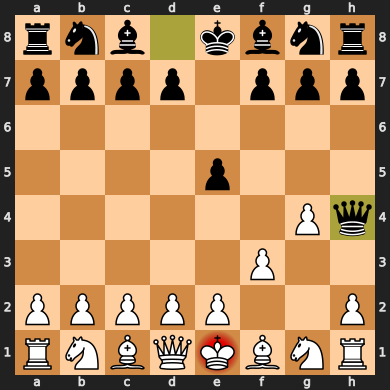

In [10]:
move_uci = chess.Move.from_uci("g2g4")
if board.is_legal(move_uci):
    board.push(move_uci)
move_uci = chess.Move.from_uci("d8h4")
if board.is_legal(move_uci):
    board.push(move_uci)
board

We can now check that this is a checkmate!

In [11]:
#| echo: true
board.is_checkmate()

True

We can also undo the previous move:

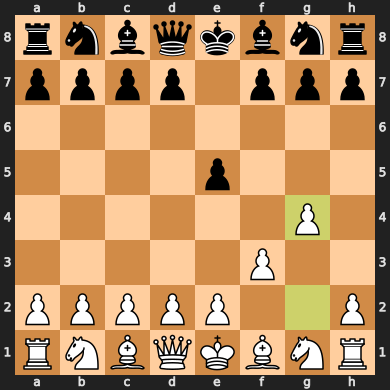

In [12]:
#| echo: true
board.pop()
board

# Context for Language Models

The reason I learned about the `chess` library was because I was looking for representation of the chess board and I saw that [TextArena](https://www.textarena.ai/docs/overview) has some function to represent the board from the `chess` library (see code [here](https://github.com/LeonGuertler/TextArena/blob/main/textarena/envs/Chess/renderer.py)):

In [15]:
#| echo: true
def create_board_str(board: chess.Board) -> str:
    # piece_symbols = {'r': '♜', 'n': '♞', 'b': '♝', 'q': '♛', 'k': '♚', 'p': '♟', 'R': '♖', 'N': '♘', 'B': '♗', 'Q': '♕', 'K': '♔', 'P': '♙'}
    piece_symbols = {'r': 'r', 'n': 'n', 'b': 'b', 'q': 'q', 'k': 'k', 'p': 'p', 'R': 'R', 'N': 'N', 'B': 'B', 'Q': 'Q', 'K': 'K', 'P': 'P'}

    squares = {}
    for file_char in "abcdefgh":
        for rank_char in "12345678":
            square_name = f"{file_char}{rank_char}"
            piece = board.piece_at(chess.parse_square(square_name))
            squares[square_name] = piece_symbols[piece.symbol()] if piece else " "

    board_template = f"""
    a    b    c    d    e    f    g    h  
  ┌────┬────┬────┬────┬────┬────┬────┬────┐
8 │ {{a8}}  │ {{b8}}  │ {{c8}}  │ {{d8}}  │ {{e8}}  │ {{f8}}  │ {{g8}}  │ {{h8}}  │ 8
  ├────┼────┼────┼────┼────┼────┼────┼────┤
7 │ {{a7}}  │ {{b7}}  │ {{c7}}  │ {{d7}}  │ {{e7}}  │ {{f7}}  │ {{g7}}  │ {{h7}}  │ 7
  ├────┼────┼────┼────┼────┼────┼────┼────┤
6 │ {{a6}}  │ {{b6}}  │ {{c6}}  │ {{d6}}  │ {{e6}}  │ {{f6}}  │ {{g6}}  │ {{h6}}  │ 6
  ├────┼────┼────┼────┼────┼────┼────┼────┤
5 │ {{a5}}  │ {{b5}}  │ {{c5}}  │ {{d5}}  │ {{e5}}  │ {{f5}}  │ {{g5}}  │ {{h5}}  │ 5
  ├────┼────┼────┼────┼────┼────┼────┼────┤
4 │ {{a4}}  │ {{b4}}  │ {{c4}}  │ {{d4}}  │ {{e4}}  │ {{f4}}  │ {{g4}}  │ {{h4}}  │ 4
  ├────┼────┼────┼────┼────┼────┼────┼────┤
3 │ {{a3}}  │ {{b3}}  │ {{c3}}  │ {{d3}}  │ {{e3}}  │ {{f3}}  │ {{g3}}  │ {{h3}}  │ 3
  ├────┼────┼────┼────┼────┼────┼────┼────┤
2 │ {{a2}}  │ {{b2}}  │ {{c2}}  │ {{d2}}  │ {{e2}}  │ {{f2}}  │ {{g2}}  │ {{h2}}  │ 2
  ├────┼────┼────┼────┼────┼────┼────┼────┤
1 │ {{a1}}  │ {{b1}}  │ {{c1}}  │ {{d1}}  │ {{e1}}  │ {{f1}}  │ {{g1}}  │ {{h1}}  │ 1
  └────┴────┴────┴────┴────┴────┴────┴────┘
    a    b    c    d    e    f    g    h
"""
    return board_template.format(**squares)
    
print(create_board_str(board))


    a    b    c    d    e    f    g    h  
  ┌────┬────┬────┬────┬────┬────┬────┬────┐
8 │ r  │ n  │ b  │ q  │ k  │ b  │ n  │ r  │ 8
  ├────┼────┼────┼────┼────┼────┼────┼────┤
7 │ p  │ p  │ p  │ p  │    │ p  │ p  │ p  │ 7
  ├────┼────┼────┼────┼────┼────┼────┼────┤
6 │    │    │    │    │    │    │    │    │ 6
  ├────┼────┼────┼────┼────┼────┼────┼────┤
5 │    │    │    │    │ p  │    │    │    │ 5
  ├────┼────┼────┼────┼────┼────┼────┼────┤
4 │    │    │    │    │    │    │ P  │    │ 4
  ├────┼────┼────┼────┼────┼────┼────┼────┤
3 │    │    │    │    │    │ P  │    │    │ 3
  ├────┼────┼────┼────┼────┼────┼────┼────┤
2 │ P  │ P  │ P  │ P  │ P  │    │    │ P  │ 2
  ├────┼────┼────┼────┼────┼────┼────┼────┤
1 │ R  │ N  │ B  │ Q  │ K  │ B  │ N  │ R  │ 1
  └────┴────┴────┴────┴────┴────┴────┴────┘
    a    b    c    d    e    f    g    h



I think it is some good context for language models to get the positions in the board.

## Dataset Checkmate In One BIG-Bench

Given that we know how to do a text representation of the positions in the board, we can use the dataset from the BIG-Bench called [Checkmate In One](https://github.com/google/BIG-bench/tree/092b196c1f8f14a54bbc62f24759d43bde46dd3b/bigbench/benchmark_tasks/checkmate_in_one). This dataset already has a text representation. For example:
```
1. d4 d5 2. Nf3 Nf6 3. e3 a6 4. Nc3 e6 5. Bd3 h6
6. e4 dxe4 7. Bxe4 Nxe4 8. Nxe4 Bb4+ 9. c3 Ba5 10. Qa4+ Nc6
11. Ne5 Qd5 12. f3 O-O 13. Nxc6 bxc6 14. Bf4 Ra7 15. Qb3 Qb5
16. Qxb5 cxb5 17. a4 bxa4 18. Rxa4 Bb6 19. Kf2 Bd7 20. Ke3 Bxa4
21. Ra1 Bc2 22. c4 Bxe4 23. fxe4 c5 24. d5 exd5 25. exd5 Re8+
26. Kf3 Rae7 27. Rxa6 Bc7 28. Bd2 Re2 29. Bc3 R8e3+ 30. Kg4 Rxg2+
31. Kf5
```

where the checkmate in one is the move `Rg5#`.

I wanted to provide an easier representation for small language models:

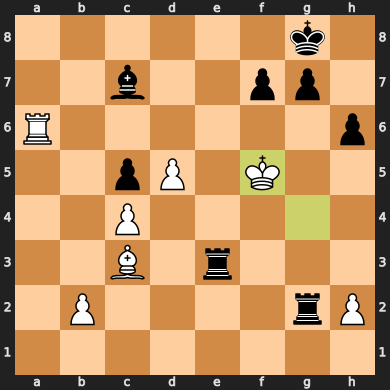


    a    b    c    d    e    f    g    h  
  ┌────┬────┬────┬────┬────┬────┬────┬────┐
8 │    │    │    │    │    │    │ k  │    │ 8
  ├────┼────┼────┼────┼────┼────┼────┼────┤
7 │    │    │ b  │    │    │ p  │ p  │    │ 7
  ├────┼────┼────┼────┼────┼────┼────┼────┤
6 │ R  │    │    │    │    │    │    │ p  │ 6
  ├────┼────┼────┼────┼────┼────┼────┼────┤
5 │    │    │ p  │ P  │    │ K  │    │    │ 5
  ├────┼────┼────┼────┼────┼────┼────┼────┤
4 │    │    │ P  │    │    │    │    │    │ 4
  ├────┼────┼────┼────┼────┼────┼────┼────┤
3 │    │    │ B  │    │ r  │    │    │    │ 3
  ├────┼────┼────┼────┼────┼────┼────┼────┤
2 │    │ P  │    │    │    │    │ r  │ P  │ 2
  ├────┼────┼────┼────┼────┼────┼────┼────┤
1 │    │    │    │    │    │    │    │    │ 1
  └────┴────┴────┴────┴────┴────┴────┴────┘
    a    b    c    d    e    f    g    h



In [18]:
#| echo: true
moves_str = """
1. d4 d5 2. Nf3 Nf6 3. e3 a6 4. Nc3 e6 5. Bd3 h6
6. e4 dxe4 7. Bxe4 Nxe4 8. Nxe4 Bb4+ 9. c3 Ba5 10. Qa4+ Nc6
11. Ne5 Qd5 12. f3 O-O 13. Nxc6 bxc6 14. Bf4 Ra7 15. Qb3 Qb5
16. Qxb5 cxb5 17. a4 bxa4 18. Rxa4 Bb6 19. Kf2 Bd7 20. Ke3 Bxa4
21. Ra1 Bc2 22. c4 Bxe4 23. fxe4 c5 24. d5 exd5 25. exd5 Re8+
26. Kf3 Rae7 27. Rxa6 Bc7 28. Bd2 Re2 29. Bc3 R8e3+ 30. Kg4 Rxg2+
31. Kf5"""
moves = [move for move in moves_str.split() if not move[0].isdigit()]
board = chess.Board()
for move in moves:
    move_uci = board.parse_san(move)
    if board.is_legal(move_uci):
        board.push_san(move)
    else:
        print("Error: Invalid move")
display(board)
print(create_board_str(board))

I think this is a much simpler task (hopefully not too simple) for small language models to solve.

GPT-4o failed when given this task:

![](ChatGPT-chess.jpg)

The conversation can be found here: [https://chatgpt.com/s/t_68683067ff7081919314e8573ec64d5d](https://chatgpt.com/s/t_68683067ff7081919314e8573ec64d5d)

The prompt was the following:

```
You are playing Black in a game of Chess. The initial state of the board was this:

    a    b    c    d    e    f    g    h  
  ┌────┬────┬────┬────┬────┬────┬────┬────┐
8 │ r  │ n  │ b  │ q  │ k  │ b  │ n  │ r  │ 8
  ├────┼────┼────┼────┼────┼────┼────┼────┤
7 │ p  │ p  │ p  │ p  │ p  │ p  │ p  │ p  │ 7
  ├────┼────┼────┼────┼────┼────┼────┼────┤
6 │    │    │    │    │    │    │    │    │ 6
  ├────┼────┼────┼────┼────┼────┼────┼────┤
5 │    │    │    │    │    │    │    │    │ 5
  ├────┼────┼────┼────┼────┼────┼────┼────┤
4 │    │    │    │    │    │    │    │    │ 4
  ├────┼────┼────┼────┼────┼────┼────┼────┤
3 │    │    │    │    │    │    │    │    │ 3
  ├────┼────┼────┼────┼────┼────┼────┼────┤
2 │ P  │ P  │ P  │ P  │ P  │ P  │ P  │ P  │ 2
  ├────┼────┼────┼────┼────┼────┼────┼────┤
1 │ R  │ N  │ B  │ Q  │ K  │ B  │ N  │ R  │ 1
  └────┴────┴────┴────┴────┴────┴────┴────┘
    a    b    c    d    e    f    g    h

The current state of the board is this:

    a    b    c    d    e    f    g    h  
  ┌────┬────┬────┬────┬────┬────┬────┬────┐
8 │    │    │    │    │    │    │ k  │    │ 8
  ├────┼────┼────┼────┼────┼────┼────┼────┤
7 │    │    │ b  │    │    │ p  │ p  │    │ 7
  ├────┼────┼────┼────┼────┼────┼────┼────┤
6 │ R  │    │    │    │    │    │    │ p  │ 6
  ├────┼────┼────┼────┼────┼────┼────┼────┤
5 │    │    │ p  │ P  │    │ K  │    │    │ 5
  ├────┼────┼────┼────┼────┼────┼────┼────┤
4 │    │    │ P  │    │    │    │    │    │ 4
  ├────┼────┼────┼────┼────┼────┼────┼────┤
3 │    │    │ B  │    │ r  │    │    │    │ 3
  ├────┼────┼────┼────┼────┼────┼────┼────┤
2 │    │ P  │    │    │    │    │ r  │ P  │ 2
  ├────┼────┼────┼────┼────┼────┼────┼────┤
1 │    │    │    │    │    │    │    │    │ 1
  └────┴────┴────┴────┴────┴────┴────┴────┘
    a    b    c    d    e    f    g    h

Make your move in standard algebraic notation format enclosed in square brackets (e.g., [e4]).
You can also include additional text in your messages.
It's your turn. Find the checkmate in one.
```

If you want to use the Checkmate In One BIG-Bench with that text representation, it can be found here:

[https://hf.co/datasets/alonsosilva/chess_checkmate_in_one_big_bench](https://hf.co/datasets/alonsosilva/chess_checkmate_in_one_big_bench)

The future plan is to do Reinforcement Learning with Verifiable Rewards with that dataset. And the longer term plan is to do multi-turn reinforcement learning with that game. Similar efforts have already been done with the games `Tic Tac Toe` and `2048`:
[https://github.com/OpenPipe/ART?tab=readme-ov-file](https://github.com/OpenPipe/ART?tab=readme-ov-file)